In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('creditcard.csv')

In [14]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
df.dropna(inplace=True)

In [17]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

biased data -> accuracy doesnt work as a metric

In [18]:
#pd.plotting.scatter_matrix(df[:1000],diagonal='kde',figsize=[27,27])
#plt.show()

<AxesSubplot: >

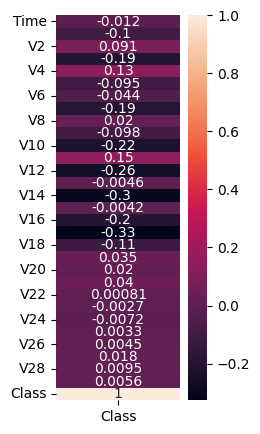

In [19]:
fig, ax = plt.subplots(figsize=(2,5)) 
sns.heatmap(pd.DataFrame(df.corr().Class),annot=True,ax=ax)

## Data Split

In [20]:
from sklearn.model_selection import train_test_split
seed = 1

X = df.drop('Class',axis=1)
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=seed)

## Classifier

In [21]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = [
                'ADB',
                'GBC',
                'RFC',
                'KNC',
                #'SVC',
                'DecisionTree',
                'XGBoost',
                'LightGBM',
                'MLP'
        ]


clfs =  [
                AdaBoostClassifier(random_state=seed),
                GradientBoostingClassifier(random_state=seed),
                RandomForestClassifier(random_state=seed,n_jobs=-1),
                KNeighborsClassifier(n_jobs=-1),
                #SVC(random_state=seed),
                DecisionTreeClassifier(random_state=seed),
                XGBClassifier(random_state=seed),
                LGBMClassifier(random_state=seed),
                MLPClassifier(random_state=seed),
        ]

params = {
            models[0]:{'clf__learning_rate':[0.1], 'clf__n_estimators':[100,150]},
            models[1]:{'clf__learning_rate':[0.1], 'clf__n_estimators':[100], 'clf__max_depth':[1,2,3],
                       'clf__min_samples_split':[2],'clf__min_samples_leaf': [2]},
            models[2]:{'clf__n_estimators':[100], 'clf__criterion':['gini'],'clf__min_samples_split':[2],
                      'clf__min_samples_leaf': [4]},
            models[3]:{'clf__n_neighbors':[2,5,10,15], 'clf__weights':['distance'],'clf__leaf_size':[15]},
            #models[4]: {'C':[1,100], 'tol': [0.005],'gamma':['auto'], 'kernel':['rbf']},
            models[4]: {'clf__criterion':['gini'],'clf__max_features':[None,'log2']},
            models[5]: {"clf__max_depth": [1, 2, 3], "clf__learning_rate": [0.5, 0.1, 0.05]},
            models[6]: {'clf__boosting_type':['dart']},
            models[7]: {'clf__learning_rate':['adaptive'],'clf__early_stopping':[True,False],'clf__max_iter':[200,500,1000]}
         }

In [22]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


import time


test_scores = []
for name, estimator in zip(models,clfs):
    print(name)
    st = time.time()
    pipeline = [('scaler', StandardScaler()), ('clf',estimator)]
    clf = GridSearchCV(Pipeline(steps=pipeline), params[name], scoring='neg_log_loss', refit='True', n_jobs=-1, cv=3)
    
    clf.fit(X_train, y_train)
    et = time.time()


    print("best params: " + str(clf.best_params_))
    print("best scores: " + str(clf.best_score_))


    roc_auc = roc_auc_score(y_test, clf.predict(X_test))
    print("ROC AUC: {:.4%}".format(roc_auc))
    acc = accuracy_score(y_test, clf.predict(X_test))
    print("Accuracy: {:.4%}".format(acc))
    print('Execution time: {:.0f} seconds\n'.format((et - st)))

    test_scores.append((roc_auc,clf.best_score_,clf.best_params_))

ADB
best params: {'clf__learning_rate': 0.1, 'clf__n_estimators': 100}
best scores: -0.2988374157760372
ROC AUC: 86.1416%
Accuracy: 99.9380%
Execution time: 164 seconds

GBC
best params: {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: -0.02780430303976326
ROC AUC: 60.4648%
Accuracy: 99.8467%
Execution time: 345 seconds

RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: -0.007315006715101428
ROC AUC: 91.2115%
Accuracy: 99.9602%
Execution time: 44 seconds

KNC
best params: {'clf__leaf_size': 15, 'clf__n_neighbors': 15, 'clf__weights': 'distance'}
best scores: -0.01121989755898039
ROC AUC: 90.8725%
Accuracy: 99.9567%
Execution time: 46 seconds

DecisionTree
best params: {'clf__criterion': 'gini', 'clf__max_features': None}
best scores: -0.033627530488608254
ROC AUC: 89.5024%
Accuracy: 99.9146%
Execution t